# CASO PRÁCTICO 1 - COVID 19
## COVID_DATA - Modelo de Regresión Logística para Predecir el Riesgo de Covid 19 
Los datos con los que vamos a realizar el modelo fueron obtenidos de un archivo CSV del Gobierno de México y maneja información sobre las caracteristicas que comparten los pacientes afectados por COVID - 19, ayudando también a ver cuales de esas caracteristicas podían entrar como factores de riesgo también, la terminología usada fue: 
- USMER: Unidad de atención médica.
- MEDICAL_UNIT: Unidad médica asignada.
- SEX: Género del paciente.
- PATIENT_TYPE: Tipo de paciente (hospitalizado, ambulatorio, etc.).
- DATE_DIED: Fecha de fallecimiento (si aplica).
- INTUBED: Si el paciente fue intubado.
- PNEUMONIA: Presencia de neumonía.
- AGE: Edad del paciente.
- PREGNANT: Estado de embarazo.
- DIABETES: Presencia de diabetes.
- COPD: Enfermedad pulmonar obstructiva crónica.
- ASTHMA: Presencia de asma.
- INMSUPR: Inmunosupresión.
- HIPERTENSION: Presencia de hipertensión.
- OTHER_DISEASE: Otras enfermedades.
- CARDIOVASCULAR: Enfermedades cardiovasculares.
- OBESITY: Obesidad.
- RENAL_CHRONIC: Enfermedad renal crónica.
- TOBACCO: Uso de tabaco.
- CLASIFFICATION_FINAL: Clasificación final del paciente.
- ICU: Si el paciente fue admitido en la UCI.


## Carga de datos, librerías y preprocesamiento de datos
 En esta parte inicial, se añadieron librerías que eran necesarias para las funciones del programa, además se agregó la función para que se cargaran los datos y se comenzara su preprocesamiento, volviendo booleanas las columnas y convirtiendo en datos NaN los valores nulos o que no fueran funcionales para nuestro modelo. 

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                          0
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE                0
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64
Filas restantes después de eliminar NaN: 77100
RISK
1    35640
0    35640
Name: count, dtype: int64


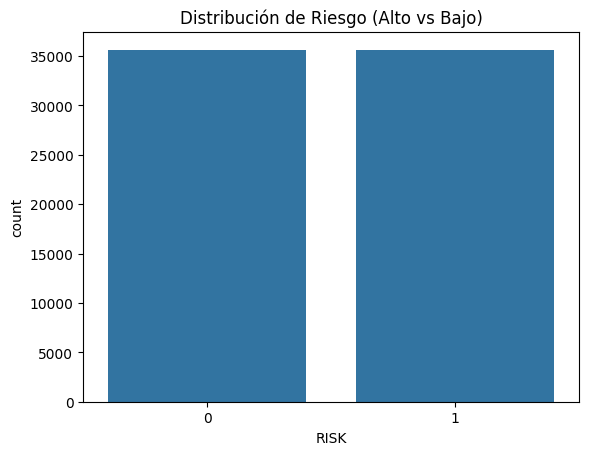

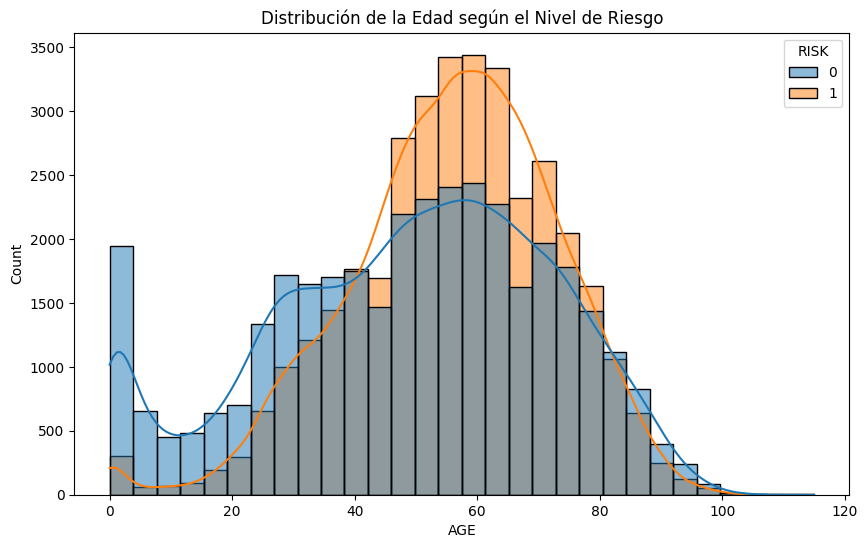

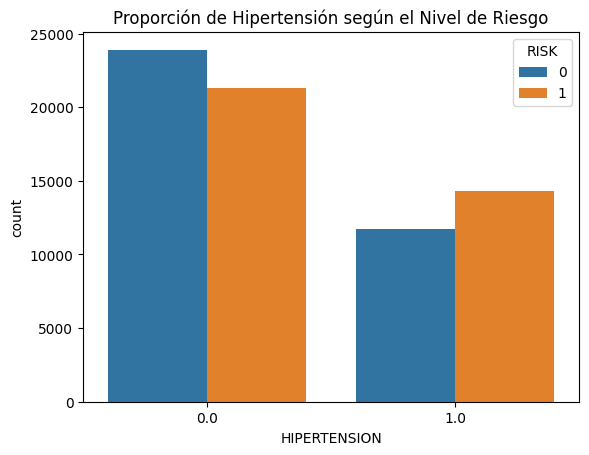

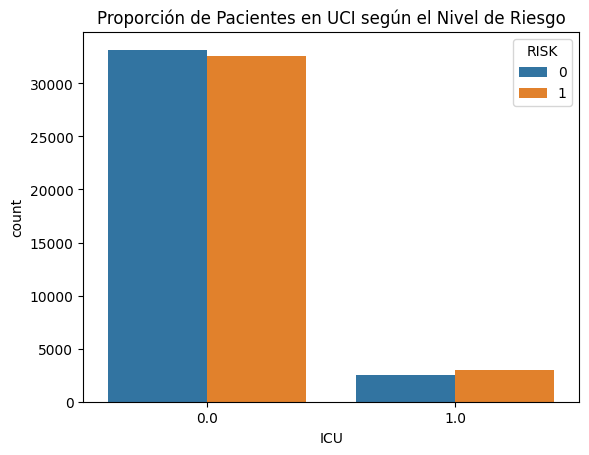

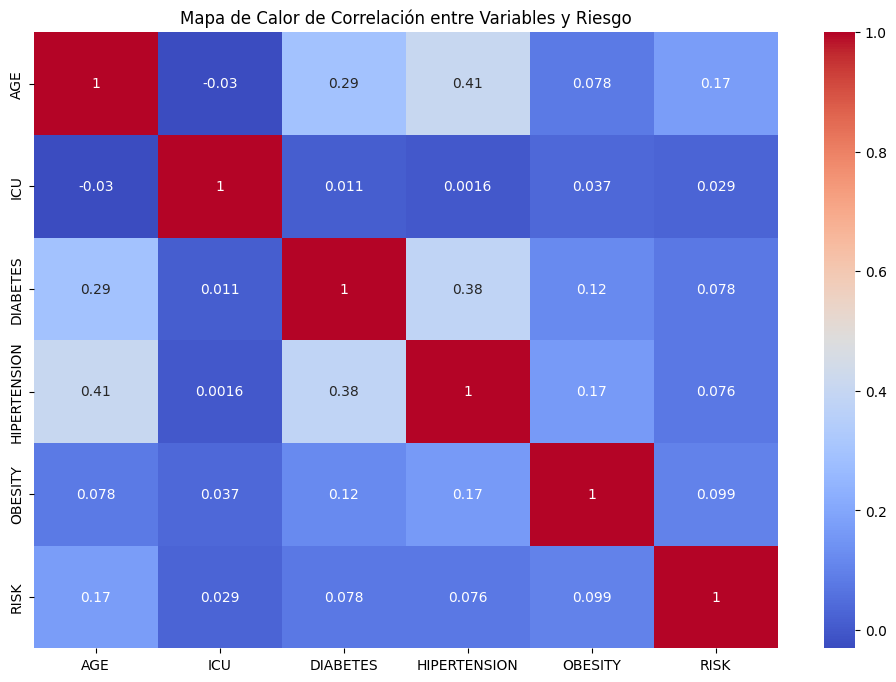

Accuracy: 0.6218434343434344


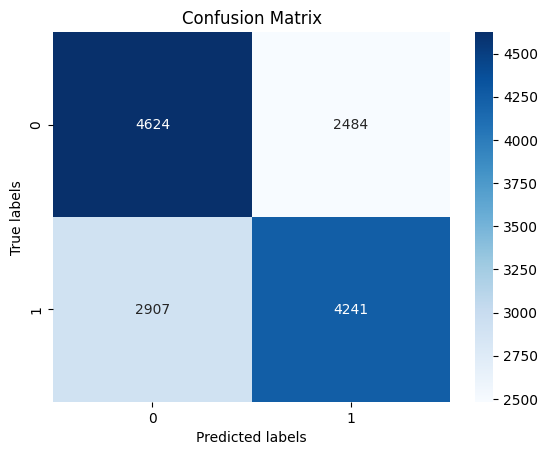

AUC: 0.6729912566497422


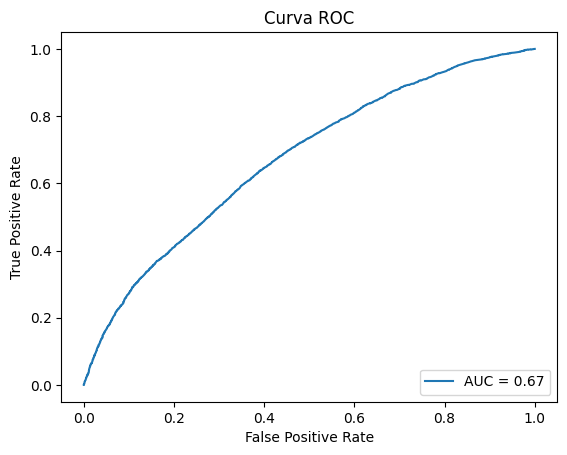

In [5]:
#Insertar librerías necesarias para ejecutar el programa 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo de datos (archivo CSV)
file_path = "C:/Users/DELL/Downloads/Covid_Data.csv"  
data = pd.read_csv(file_path)  # Cambiado a read_csv

bool_cols = ['SEX', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 
             'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 
             'INTUBED', 'ICU']

for col in bool_cols:
    data[col] = data[col].replace({1: 1, 2: 0, 97: np.nan, 99: np.nan, 98: np.nan})

# Convertir 'DATE_DIED' en una columna booleana donde 1 es muerte y 0 es no muerte
data['DATE_DIED'] = data['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)

# Verificar cuántos valores faltantes hay en cada columna
print(data.isnull().sum())

# Eliminar filas que contienen valores NaN en cualquier columna
data = data.dropna()

# Verificar cuántas filas quedan después de la eliminación
print(f"Filas restantes después de eliminar NaN: {data.shape[0]}")
++++




## Creación de la columna RISK, y undersampling == 1
Se crea la columna risk que ayudará a contener los datos de la clasificación final, que donde los valores 1, 2 y 3 (pacientes con Covid) se asignan como "alto riesgo" (1), y los valores 4 o superiores como "bajo riesgo" (0). Posteriormente en la sección del Undersampling se usa esta tecnica que iguala los datos de las muestras a la misma cantidad, lo cual se hace en busca de que ambos contenga una cantidad igualda de muestras y sea más facil para el modelo clasificar las clases. 

In [ ]:
# Crear columna de riesgo (1: alto riesgo, 0: bajo riesgo)
data['RISK'] = data['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

# Código de submuestreo
risk_1 = data[data['RISK'] == 1]
risk_0 = data[data['RISK'] == 0]

# Realizar submuestreo en la clase 'RISK=1' para que tenga 35640 filas
risk_1_sampled = risk_1.sample(n=35640, random_state=42)

# Concatenar las dos clases para crear el dataset balanceado
data_balanced = pd.concat([risk_1_sampled, risk_0])

# Mezclar aleatoriamente el dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar la distribución de las clases
print(data_balanced['RISK'].value_counts())

## Creación de las gráficas 
1- Distribución de Riesgo (Alto vs Bajo)
2- Distribución de la edad por nivel de riesgo
3- Proporción de pacientes con hipertensión según el riesgo
4- Proporción de pacientes en UCI por nivel de riesgo
5- Mapa de calor de la correlación entre las variables numéricas

In [ ]:
# Distribución de la variable objetivo
sns.countplot(x ='RISK', data=data_balanced)
plt.title('Distribución de Riesgo (Alto vs Bajo)')
plt.show()


In [ ]:
# Distribución de la edad por nivel de riesgo
plt.figure(figsize=(10, 6))
sns.histplot(data=data_balanced, x='AGE', hue='RISK', bins=30, kde=True)
plt.title('Distribución de la Edad según el Nivel de Riesgo')
plt.show()

In [ ]:
# Proporción de pacientes con hipertensión según el riesgo
sns.countplot(x='HIPERTENSION', hue='RISK', data=data_balanced)
plt.title('Proporción de Hipertensión según el Nivel de Riesgo')
plt.show()

In [ ]:
# Proporción de pacientes en UCI por nivel de riesgo
sns.countplot(x='ICU', hue='RISK', data=data_balanced)
plt.title('Proporción de Pacientes en UCI según el Nivel de Riesgo')
plt.show()

In [ ]:
# Mapa de calor de la correlación entre las variables numéricas
plt.figure(figsize=(12, 8))
corr = data_balanced[['AGE', 'ICU', 'DIABETES', 'HIPERTENSION', 'OBESITY', 'RISK']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación entre Variables y Riesgo')
plt.show()

## Creación de subconjuntos y normalización de datos
Se crean los subconjuntos de alto riesgo y los valores que pueden contener multiples variables en cuanto a rango, y se hace un grupo de datos más similares para que la precisión de nuestro modelo no acabe afectada por lo mismo 

In [ ]:
sintomas_actuales = data_balanced[['PNEUMONIA', 'INTUBED']]
estado_actual = data_balanced[['AGE', 'ICU', 'PATIENT_TYPE','DATE_DIED']]
historial_medico = data_balanced[['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 
                                   'CARDIOVASCULAR', 'RENAL_CHRONIC', 'OBESITY']]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, accuracy_score

# Concatenar los subconjuntos para crear la matriz de características (X)
X = pd.concat([sintomas_actuales, estado_actual, historial_medico], axis=1)

# Variable objetivo (RISK)
y = data_balanced['RISK']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Escalar todas las características numéricas (opcional: podrías usar también StandardScaler)
scaler = MinMaxScaler(feature_range=(0, 1))  # Normalizar a un rango entre 0 y 1
X_scaled = scaler.fit_transform(X)  # Normalizar todas las características numéricas

## Entrenamiento del modelo de regresión logística
En esta sección, concatenamos las características seleccionadas para formar la matriz X, mientras que la columna RISK es la variable objetivo (y). Dividimos los datos en conjuntos de entrenamiento y prueba, y entrenamos un modelo de regresión logística utilizando las características seleccionadas.
Aunque entendí en su mayoría como empezaron a procesar los datos, al final si tuve varias dudas sobre su manejo

## Explicación de la implementación del modelo de regresión logística
Se usó el modelo de rgresión logistica para este manejo de datos y los pasos que se usaron fueron: 

- División de datos: Se separaron los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.
- Normalización: Las características fueron normalizadas para garantizar que todas estuvieran en la misma escala.
- Entrenamiento: Se utilizó el conjunto de entrenamiento para ajustar el modelo a los datos.
- Predicción: Se aplicó el modelo a los datos de prueba para predecir los resultados.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, accuracy_score

# Concatenar los subconjuntos para crear la matriz de características (X)
X = pd.concat([sintomas_actuales, estado_actual, historial_medico], axis=1)

# Variable objetivo (RISK)
y = data_balanced['RISK']

# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(penalty='l2', C=100,max_iter=1000)
model.fit(X_train, y_train)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, accuracy_score

# Concatenar los subconjuntos para crear la matriz de características (X)
X = pd.concat([sintomas_actuales, estado_actual, historial_medico], axis=1)

# Variable objetivo (RISK)
y = data_balanced['RISK']

# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(penalty='l2', C=100,max_iter=1000)
model.fit(X_train, y_train)


## Evaluación del modelo y de los coeficientes 
Se evalua la precisón del modelo utilizando la precisión (accuracy), que nos dice qué porcentaje de las predicciones fue correcto, aunque ya despues se usa el modelo de curva para aumentar la precisión del mismo.
En cuanto a los coeficientes es útil ver los coeficientes ajustados de la regresión logística:

In [ ]:
# Predecir los valores de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo usando la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

## Matriz de confusión y area de la curva AUC y curva ROC
Ayuda a tener mayor precisión de datos mediante los calculos de falsos positivos y verdaderos negativos 

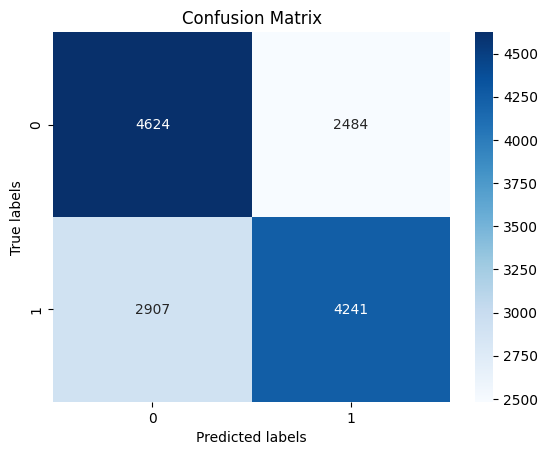

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Asegurarte de usar %matplotlib inline en un Jupyter Notebook
%matplotlib inline

# Predecir probabilidades para el cálculo de AUC
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc}")

# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## Selección y justificación de caracteristicas 
En esta parte del codigo ya usé la mayor parte de ayuda obtenida por el código de mis compañeros, por lo que la justificación de caracteristicas sería parecida a la de ellos, ya que no pude terminar de completar el proceso de graficación de manera autonoma, y eso me hizo depender más de la guía que se nos fue proporcionada.
Ellos contaron como caracteristicas principales:
1. SEXO
Los estudios han demostrado que los hombres tienen un mayor riesgo de complicaciones graves por COVID-19 en comparación con las mujeres. Este fenómeno puede estar relacionado con factores biológicos, hormonales, y de comportamiento. Los hombres suelen tener mayores tasas de comorbilidades (como hipertensión y enfermedades cardíacas) y pueden tener una respuesta inmune menos efectiva. Impacto: Moderado. Aunque el sexo afecta el riesgo, no es tan determinante como otras comorbilidades. Los hombres tienen más probabilidades de sufrir casos graves, pero esto puede depender de otros factores como la edad y las comorbilidades. "Sex differences in immune responses that underlie COVID-19 disease outcomes", por Takahashi et al. (2020). https://www.nature.com/articles/s41591-020-0965-6

2. EDAD
La edad es uno de los factores más determinantes en la predicción de riesgo. Los adultos mayores, especialmente aquellos mayores de 65 años, tienen un riesgo mucho mayor de complicaciones graves y muerte debido a la debilitación del sistema inmunológico y la prevalencia de enfermedades crónicas. Impacto: Muy alto. La edad avanzada se ha correlacionado fuertemente con un mayor riesgo de hospitalización, intubación y mortalidad en pacientes con COVID-19 y mayor probabilidad de desarrollar insuficiencia respiratoria Risk Factors Associated With Acute Respiratory Distress Syndrome and Death in Patients With Coronavirus Disease 2019 Pneumonia in Wuhan, China, por Wu et al. (2020). https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/2763184

3. NEUMONÍA
La neumonía es una de las complicaciones más comunes y graves del COVID-19. Los pacientes que desarrollan neumonía tienen una mayor probabilidad de requerir cuidados intensivos, intubación y ventilación mecánica, debido a la afectación severa de los pulmones. Impacto: Muy alto. La presencia de neumonía es un fuerte predictor de severidad y puede ser indicativa de un peor pronóstico. La neumonía es un factor clave para la gravedad de la enfermedad y está fuertemente correlacionada con la mortalidad. Clinical Characteristics and Outcomes of Patients with Severe COVID-19 and Acute Respiratory Distress Syndrome, por Yang et al. (2020). https://www.thelancet.com/journals/lanres/article/PIIS2213-2600(20)30079-5/fulltext

4. EMBARAZO
Aunque el embarazo se consideró un factor de riesgo durante la pandemia, las mujeres embarazadas en su mayoría no presentaron mayores tasas de mortalidad, aunque sí tuvieron mayor probabilidad de hospitalización y parto prematuro. Los cambios inmunológicos y fisiológicos durante el embarazo aumentan la susceptibilidad a infecciones respiratorias graves. Impacto: Moderado. El embarazo aumenta el riesgo de complicaciones, pero no es tan determinante como otras condiciones crónicas o la edad avanzada. Characteristics and outcomes of women with COVID-19 giving birth: COVID-19 in-pregnancy and early neonatal outcomes (COVID-IPO), por Allotey et al. (2020). https://www.bmj.com/content/370/bmj.m3320

5. DIABETES
La diabetes está fuertemente relacionada con un mayor riesgo de complicaciones por COVID-19. Las personas diabéticas tienen un sistema inmunológico comprometido y suelen tener problemas para controlar los niveles de glucosa durante una infección, lo que puede agravar el estado del paciente. Impacto: Alto. Los pacientes diabéticos tienen mayor riesgo de hospitalización, ingreso a UCI e incluso muerte. La hiperglucemia no controlada se asocia con una respuesta inflamatoria severa, lo que agrava la enfermedad. Association of Diabetes and COVID-19 Outcomes, por Huang et al. (2020). https://diabetes.diabetesjournals.org/content/69/10/2088

6. EPOC (Enfermedad Pulmonar Obstructiva Crónica)
Los pacientes con EPOC tienen una función pulmonar comprometida, lo que los hace especialmente vulnerables a infecciones respiratorias graves, como COVID-19. Estos pacientes suelen tener más dificultades para combatir la enfermedad y requieren hospitalización más frecuentemente. Impacto: Muy alto. La EPOC es una de las comorbilidades más relevantes en términos de riesgo respiratorio grave por COVID-19. COPD and the risk of severe COVID-19: A nationwide cohort study, por Attaway et al. (2020). https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7344724/

7. ASMA (Síntomas prolongados y empeoramiento del control del asma)
Aunque el asma se consideraba inicialmente un factor de riesgo importante, estudios posteriores mostraron que los pacientes con asma leve o moderada no presentan un riesgo significativamente mayor de complicaciones graves. Sin embargo, aquellos con asma grave y síntomas mal controlados tienen un mayor riesgo. Asthma and Risk of Severe COVID-19: A Population-Based Cohort Study, por Williamson et al. (2020). El asma leve no parece aumentar el riesgo, pero el asma grave sí. https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30984-6/fulltext

8. INMUNOSUPRESOR
Los pacientes inmunosuprimidos, ya sea por medicamentos o condiciones subyacentes (cáncer, trasplante de órganos), tienen una capacidad reducida para combatir infecciones, lo que los pone en alto riesgo de complicaciones graves. Impacto: Muy alto. Los inmunosuprimidos son uno de los grupos más vulnerables, con mayores tasas de hospitalización y mortalidad. Outcomes of COVID-19 in hospitalized patients with and without immunosuppressive medication, por Kalil et al. (2020). https://www.nejm.org/doi/full/10.1056/NEJMoa2021436

9. HIPERTENSIÓN
La hipertensión es una de las comorbilidades más comunes en pacientes con COVID-19, y estudios han encontrado que los hipertensos tienen un mayor riesgo de complicaciones graves, posiblemente debido a la relación entre la hipertensión y las enfermedades cardiovasculares y renales. Impacto: Moderado. Aunque la hipertensión por sí sola puede no ser un factor determinante, es común en pacientes con otras comorbilidades que sí son importantes, lo que eleva el riesgo general. Hypertension and COVID-19: Risks and Management, por Savoia et al. (2020). https://www.ahajournals.org/doi/full/10.1161/HYPERTENSIONAHA.120.15072

10. ENFERMEDAD CARDIOVASCULAR
Las enfermedades cardiovasculares se asocian con un peor pronóstico en casos de COVID-19. El virus puede agravar estas condiciones al causar inflamación sistémica y estrés en el sistema circulatorio. Impacto: Muy alto. Las enfermedades cardíacas aumentan significativamente el riesgo de complicaciones graves y muerte. Cardiovascular disease, drug therapy, and mortality in COVID-19, por Guo et al. (2020). https://jamanetwork.com/journals/jamacardiology/fullarticle/2763844

11. ENFERMEDAD RENAL CRÓNICA
La enfermedad renal crónica afecta la capacidad del cuerpo para regular fluidos y eliminar toxinas, lo que puede complicar la respuesta del cuerpo a una infección como COVID-19. Además, estos pacientes suelen tener otras comorbilidades graves. Impacto: Alto. La enfermedad renal crónica es un factor de riesgo importante para el desarrollo de complicaciones severas. Chronic kidney disease and outcomes of patients with COVID-19, por Cheng et al. (2020). https://www.kidney-international.org/article/S0085-2538(20)30255-6/fulltext

12. OBESIDAD
La obesidad es un fuerte predictor de complicaciones graves por COVID-19. Los pacientes obesos tienen mayor riesgo de hospitalización, necesidad de ventilación mecánica y muerte debido a la afectación pulmonar y sistémica. Impacto: Muy alto. La obesidad, especialmente la mórbida, es uno de los factores de riesgo más importantes para complicaciones graves.

13. TABACO
El consumo de tabaco está asociado con un mayor riesgo de enfermedades respiratorias crónicas y cáncer de pulmón, lo que hace que los fumadores sean más susceptibles a complicaciones graves en caso de infección por COVID-19. Impacto: Moderado. Fumar puede aumentar el riesgo de complicaciones respiratorias, pero su impacto no es tan determinante como otras condiciones. Tobacco smoking and COVID-19 infection: A systematic review, por Patanavanich y Glantz (2020). https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0236765

14. INTUBACIÓN
La necesidad de intubación en un paciente con COVID-19 indica una insuficiencia respiratoria severa. Los pacientes que requieren intubación tienen una alta tasa de mortalidad y, si sobreviven, pueden enfrentar una larga recuperación. Impacto: Muy alto. La intubación es un indicador de que el paciente está en una situación crítica.

15. SI ESTUVO EN UNIDAD DE CUIDADOS INTENSIVOS (UCI)
Haber estado en la UCI es un claro indicador de la gravedad de la enfermedad. Los pacientes que han estado en UCI son aquellos con complicaciones más severas, y esto puede predecir un peor pronóstico en caso de reinfección o futuras complicaciones. Impacto: Muy alto. Estar en la UCI es una señal de alto riesgo y puede predecir futuros episodios graves.

Y como características menos útiles:
TABACO: Aunque el consumo de tabaco es un factor de riesgo, su impacto directo en la gravedad del COVID-19 no es tan determinante como las comorbilidades crónicas. ASMA leve: El asma leve o bien controlada no parece aumentar significativamente el riesgo de complicaciones graves.

## Conclusiones 
Dentro del analisis, investigación e implementación del modelo, se fue capaz de detrminar que dentro de las características más útiles para predecir el riesgo en pacientes con COVID-19 incluyen la edad, neumonía, diabetes, EPOC, inmunosupresión, enfermedad cardiovascular, enfermedad renal crónica, y obesidad. Siendo estas las que perfilibana como mayores factores de riesgo en la contrubución del deceso de las personas, a su vez se entrení el modelo para que este fuera capaz de analizar los datos proporcionados y dar gráficas y datos adecuados, con un alto nivel de precisión